## Biodiversity in National Parks Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [2]:
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


 Clean Datasets

In [3]:
species_info.duplicated().sum()

0

In [4]:
print(observations.shape)

observations.isnull().sum()

print(observations.scientific_name[observations.scientific_name == 'Bos bison'])

(23296, 3)
2472     Bos bison
7578     Bos bison
13800    Bos bison
16868    Bos bison
Name: scientific_name, dtype: object


In [5]:
print(observations.info())
observations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [6]:
print(species_info.shape)
species_info.isnull().sum()

(5824, 4)


category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [7]:
print(species_info.info())
species_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [8]:
species_info.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [9]:
species_info.fillna('No Intervention', inplace=True)
species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention


In [10]:
conservation_table = species_info[species_info.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

conservation_table

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


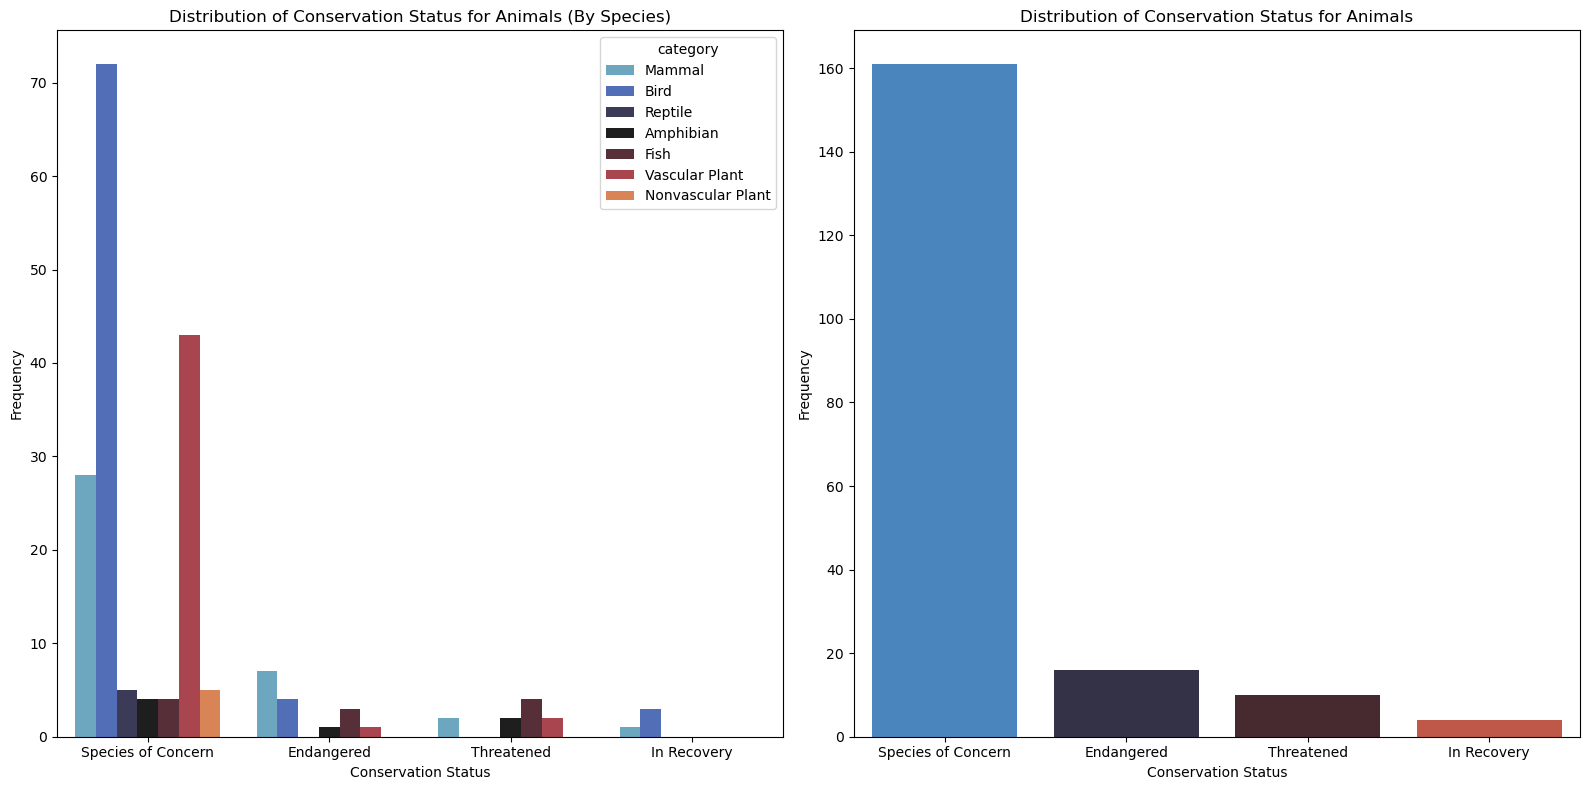

In [11]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.countplot(data=species_info[species_info.conservation_status != 'No Intervention'], x='conservation_status', hue='category', palette='icefire')
plt.title('Distribution of Conservation Status for Animals (By Species)')
plt.xlabel('Conservation Status')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(data=species_info[species_info.conservation_status != 'No Intervention'], x='conservation_status', palette='icefire')
plt.title('Distribution of Conservation Status for Animals')
plt.xlabel('Conservation Status')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
species_info['is_protected'] = species_info['conservation_status'] != 'No Intervention'

# Group by 'category' and 'is_protected', count unique species, and pivot the data
category_counts = species_info.groupby(['category', 'is_protected'])['scientific_name'].nunique().unstack(fill_value=0)

# Rename the columns for clarity
category_counts.columns = ['not_protected', 'protected']

# Reset the index to make 'category' a regular column
category_counts.reset_index(inplace=True)

# Rename the 'category' column
category_counts.rename(columns={'category':'species'}, inplace=True)

category_counts

,species,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [13]:
category_counts['%_protected'] = round((category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100), 2)

category_counts

,species,not_protected,protected,%_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


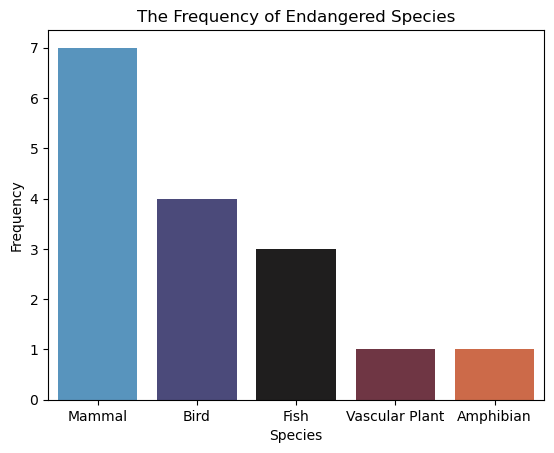

In [14]:
category_counts = species_info.category[species_info.conservation_status == 'Endangered'].value_counts()
category_df = pd.DataFrame({'species':category_counts.index, 'count':category_counts.values})

plt.figure()

sns.barplot(data=category_df, x='species', y='count', palette='icefire')

plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('The Frequency of Endangered Species')
plt.show()

Mammals Vs Reptiles

In [15]:
def sum_significance(arr_a, arr_b):
    contingency_table = np.array([arr_a, arr_b])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

In [16]:
sum_significance([146, 30], [73, 5])

Chi-squared statistic: 4.289183096203645
P-value: 0.03835559022969898
Degrees of freedom: 1
Expected frequencies:
[[151.7480315  24.2519685]
 [ 67.2519685  10.7480315]]


In [17]:
sum_significance([146, 30], [413, 75])

Chi-squared statistic: 0.16170148316545574
P-value: 0.6875948096661336
Degrees of freedom: 1
Expected frequencies:
[[148.1686747  27.8313253]
 [410.8313253  77.1686747]]


In [18]:
sum_significance([413, 75], [73, 5])

Chi-squared statistic: 3.739654778685496
P-value: 0.053135422321542065
Degrees of freedom: 1
Expected frequencies:
[[419.02473498  68.97526502]
 [ 66.97526502  11.02473498]]


Species Most Spotted at the Park

In [19]:
# Create a dictionary mapping 'scientific_name' to 'category'
name_to_category = species_info.set_index('scientific_name')['category'].to_dict()

# Add a new column 'category' to observations based on 'scientific_name' mapping
observations['category'] = observations['scientific_name'].map(name_to_category)

observations.head(10)

,scientific_name,park_name,observations,category
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant
6,Spizella pusilla,Yellowstone National Park,228,Bird
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant


In [20]:
observations.park_name.value_counts().reset_index()

,index,park_name
0,Great Smoky Mountains National Park,5824
1,Yosemite National Park,5824
2,Bryce National Park,5824
3,Yellowstone National Park,5824


In [21]:
park_count = observations.groupby('park_name').observations.sum().reset_index()
park_count

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


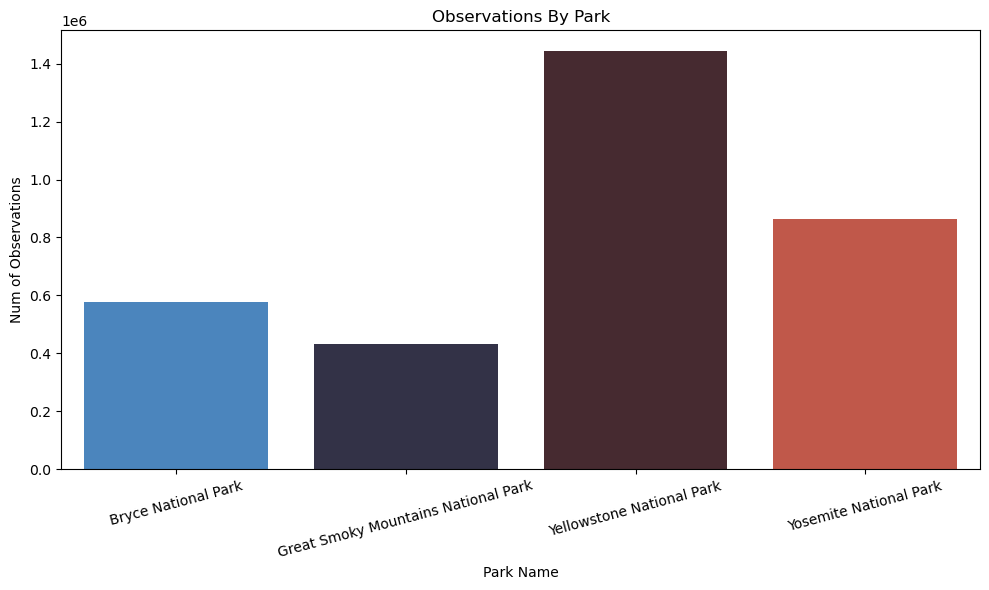

In [48]:
plt.figure(figsize=(10,6))

sns.barplot(data=park_count, x='park_name', y='observations', palette='icefire')

plt.xlabel('Park Name')
plt.ylabel('Num of Observations')
plt.title('Observations By Park')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [23]:
specie_count = observations.groupby(['park_name', 'category']).observations.sum().reset_index()
specie_count[specie_count.park_name=='Yellowstone National Park']

,park_name,category,observations
14,Yellowstone National Park,Amphibian,19440
15,Yellowstone National Park,Bird,127251
16,Yellowstone National Park,Fish,30574
17,Yellowstone National Park,Mammal,50795
18,Yellowstone National Park,Nonvascular Plant,83021
19,Yellowstone National Park,Reptile,19554
20,Yellowstone National Park,Vascular Plant,1112927


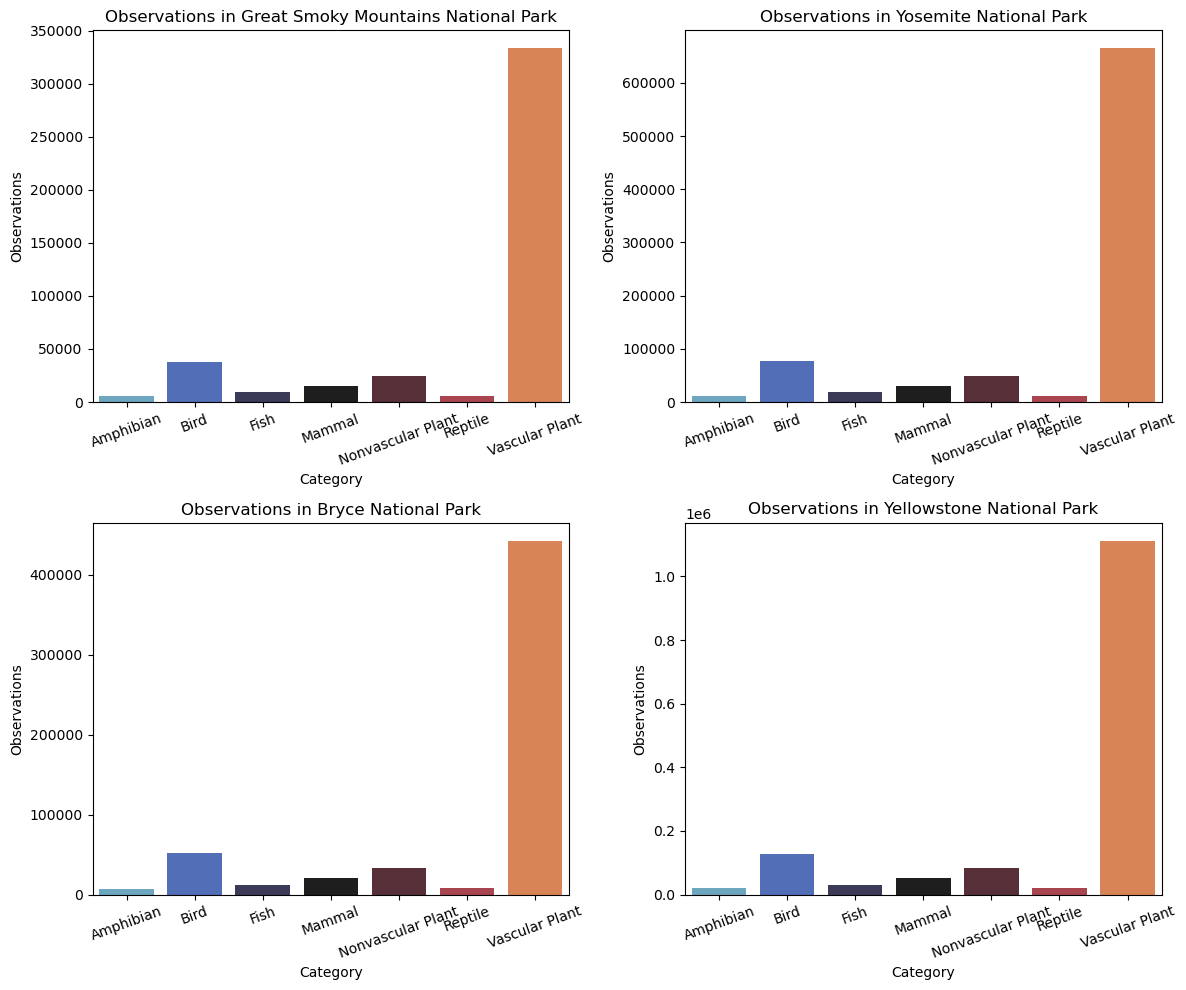

<Figure size 640x480 with 0 Axes>

In [24]:
# Create a list of unique park names
park_list = [name for name in observations.park_name.value_counts().index]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rotate x-axis labels for all subplots
plt.xticks(rotation=15)

# Iterate through each park and create a bar plot in the corresponding subplot
for i, park_name in enumerate(park_list):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]  # Select the current subplot
    park_data = specie_count[specie_count.park_name == park_name]
    
    sns.barplot(data=park_data, x='category', y='observations', ax=ax, palette='icefire')
    ax.set_title(f'Observations in {park_name}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Observations')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    
    
# Remove any remaining empty subplots if len(park_list) < 4
for i in range(len(park_list), 4):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

    
plt.tight_layout()
plt.show()
plt.clf()

Animal Most Spotted At Park

In [25]:
import re

# Split the common_names and remove punctuation from each word in the list
common_names = species_info[species_info.category == "Mammal"].common_names.str.split().tolist()
common_names = [[re.sub(r'[^\w\s]', '', word) for word in name_list] for name_list in common_names]

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [26]:
common_names = [list(set(name_list)) for name_list in common_names]

common_names[:6]

[['Vole', 'Gappers', 'RedBacked'],
 ['Bison', 'American'],
 ['Cattle', 'Aurochs', 'Domestic', 'Feral', 'Domesticated'],
 ['Mouflon', 'Red', 'Sheep', 'Domestic', 'Feral'],
 ['Elk', 'Or', 'Wapiti'],
 ['WhiteTailed', 'Deer']]

In [27]:
# Collapse into a single list
common_list = [word for name_list in common_names for word in name_list]
common_list[:6]

['Vole', 'Gappers', 'RedBacked', 'Bison', 'American', 'Cattle']

In [28]:
from collections import Counter

# Count the frequency of each word
word_counts = Counter(common_list)

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency']).reset_index()
word_counts_df.rename(columns={'index': 'Word'}, inplace=True)
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

word_counts_df.head(10)

,Word,Frequency
51,Bat,23
109,Shrew,18
57,Myotis,17
87,Mouse,16
107,Chipmunk,13
4,American,12
104,Squirrel,12
37,Eastern,11
0,Vole,11
134,Western,10


In [29]:
species_info['is_bat'] = species_info.common_names.str.contains(r'\bBat\b', regex=True)

species_info[species_info.is_bat == True]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [30]:
bat_observations = observations.merge(species_info[species_info.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [34]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [36]:
bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


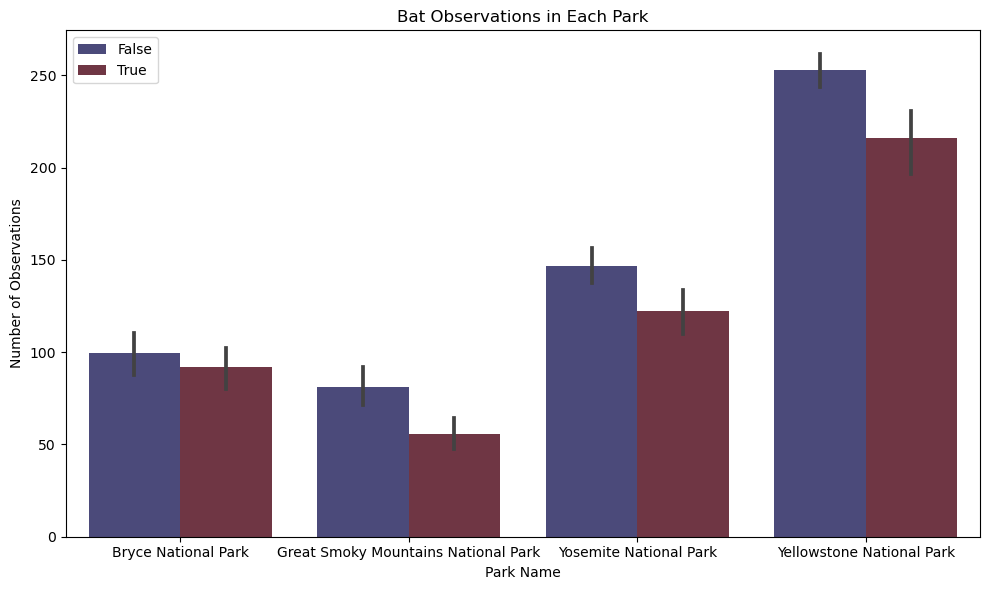

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(10,6))

sns.barplot(data=bat_observations, x='park_name', y='observations', hue= 'is_protected', palette='icefire')

plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Bat Observations in Each Park')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()
plt.clf()